<a href="https://colab.research.google.com/github/fromakim/2021Election_Analysis/blob/main/data_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Dev Environment

In [1]:
from google.colab import drive

In [2]:
import networkx as nx
import pandas as pd

In [3]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# 2. Import Data

In [4]:
users = pd.read_csv('./gdrive/MyDrive/Colab Notebooks/election_sample/user.csv')
medias = pd.read_csv('./gdrive/MyDrive/Colab Notebooks/election_sample/media.csv')
tweets = pd.read_csv('./gdrive/MyDrive/Colab Notebooks/election_sample/tweet.csv')

In [5]:
mentions = pd.read_csv('./gdrive/MyDrive/Colab Notebooks/election_sample/mention.csv')
hashtags = pd.read_csv('./gdrive/MyDrive/Colab Notebooks/election_sample/hashtag.csv')

In [6]:
mentions = pd.merge(left = mentions, right = users[['id', 'username']], how = 'inner', on = 'username')
mentions.columns = ['id_from', 'start', 'end', 'to_username', 'id_to']

In [7]:
mentions = mentions.drop_duplicates().reset_index(drop = True)

# 3. Create Nodes

In [8]:
G = nx.DiGraph()

In [9]:
G.add_nodes_from(users[:100]['id'])

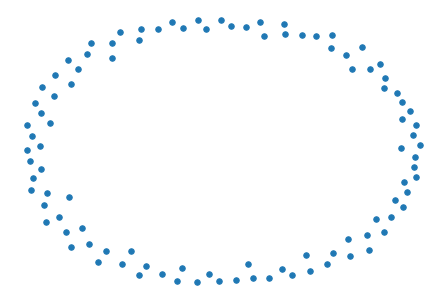

In [10]:
nx.draw(G, with_labels = False, node_size = 30)

In [11]:
G.add_edges_from(mentions.apply(lambda x : (x['id_from'], x['id_to']), axis = 'columns'))

In [12]:
G.number_of_edges()

3

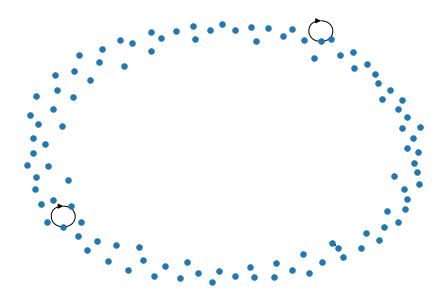

In [13]:
nx.draw(G, with_labels = False, node_size = 30)

In [14]:
hashtags.head()

,id,start,end,tag
0,1920027500,48,71,WeAreWithYouAmberHeard
1,1920027500,72,84,YouAreHeard
2,1266709871598026752,0,10,베리베리홍보사절단
3,1140251360,70,96,TransRightsAreHumanRights
4,1237782454817021952,0,6,오직문재인


In [15]:
hashtags = pd.DataFrame(hashtags.pivot_table(index = 'tag', values = 'id', aggfunc = list).to_records())

In [16]:
hashtags['id'] = hashtags['id'].map(lambda x : list(set(x)))

In [17]:
hashtags

,tag,id
0,1인미디어,[105506258]
1,20up,[702802410683523072]
2,20대대통령이낙연,"[236208249, 1447788742698102789]"
3,20대이낙연대통령,[2280041448]
4,30인변호사비대납의혹,[2414228221]
...,...,...
1064,휴닝카이,[1303328490951856128]
1065,흑룡해병,[236208249]
1066,희생_아닌_연대로_함께합니다,[1058912203489730561]
1067,히로아카,[918276539350884354]


In [18]:
import itertools

In [19]:
list(itertools.permutations([1, 2, 3], 2))

[(1, 2), (1, 3), (2, 1), (2, 3), (3, 1), (3, 2)]

In [20]:
hashtags['num'] = hashtags['id'].map(lambda x : len(x))

In [21]:
hashtags['permutation'] = hashtags['id'].map(lambda x : list(itertools.permutations(x, 2)))

In [22]:
hashtags = hashtags[hashtags['num'] != 1].reset_index(drop = True)

In [23]:
hashtags

,tag,id,num,permutation
0,20대대통령이낙연,"[236208249, 1447788742698102789]",2,"[(236208249, 1447788742698102789), (1447788742..."
1,BTS,"[955330457469517824, 1184891028014129153, 1341...",6,"[(955330457469517824, 1184891028014129153), (9..."
2,GirlsCanDoAnything,"[112409379, 2795650459, 101495628, 1422714404]",4,"[(112409379, 2795650459), (112409379, 10149562..."
3,Girls_can_do_anything,"[191461400, 133421105]",2,"[(191461400, 133421105), (133421105, 191461400)]"
4,Girlscandoanything,"[52592401, 777391994]",2,"[(52592401, 777391994), (777391994, 52592401)]"
...,...,...,...,...
84,코로나19,"[127765731, 2148100236]",2,"[(127765731, 2148100236), (2148100236, 1277657..."
85,탈핵,"[228732880, 390871704, 201594127]",3,"[(228732880, 390871704), (228732880, 201594127..."
86,토착왜구박멸,"[1184891028014129153, 137629766]",2,"[(1184891028014129153, 137629766), (137629766,..."
87,행동하는양심,"[1049716296, 948461710238560256]",2,"[(1049716296, 948461710238560256), (9484617102..."


In [24]:
hashtags = hashtags.explode('permutation', ignore_index = True)

In [25]:
hashtags

,tag,id,num,permutation
0,20대대통령이낙연,"[236208249, 1447788742698102789]",2,"(236208249, 1447788742698102789)"
1,20대대통령이낙연,"[236208249, 1447788742698102789]",2,"(1447788742698102789, 236208249)"
2,BTS,"[955330457469517824, 1184891028014129153, 1341...",6,"(955330457469517824, 1184891028014129153)"
3,BTS,"[955330457469517824, 1184891028014129153, 1341...",6,"(955330457469517824, 1341565288605577217)"
4,BTS,"[955330457469517824, 1184891028014129153, 1341...",6,"(955330457469517824, 141804602)"
...,...,...,...,...
1629,환경,"[1316757847128961024, 390871704, 201594127]",3,"(1316757847128961024, 201594127)"
1630,환경,"[1316757847128961024, 390871704, 201594127]",3,"(390871704, 1316757847128961024)"
1631,환경,"[1316757847128961024, 390871704, 201594127]",3,"(390871704, 201594127)"
1632,환경,"[1316757847128961024, 390871704, 201594127]",3,"(201594127, 1316757847128961024)"


In [28]:
hashtags['permutation']

0                (236208249, 1447788742698102789)
1                (1447788742698102789, 236208249)
2       (955330457469517824, 1184891028014129153)
3       (955330457469517824, 1341565288605577217)
4                 (955330457469517824, 141804602)
                          ...                    
1629             (1316757847128961024, 201594127)
1630             (390871704, 1316757847128961024)
1631                       (390871704, 201594127)
1632             (201594127, 1316757847128961024)
1633                       (201594127, 390871704)
Name: permutation, Length: 1634, dtype: object

In [29]:
G.add_edges_from(hashtags['permutation'])

In [30]:
G.number_of_edges()

1303

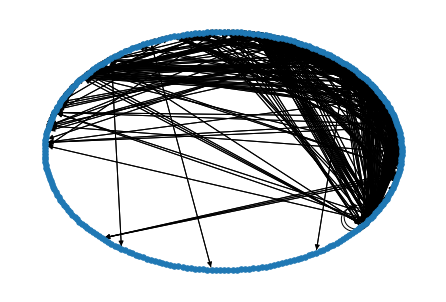

In [37]:
nx.draw_shell(G, with_labels = False, node_size = 30)

In [32]:
G.number_of_nodes()

267

In [42]:
tbr = [x for x in G.nodes() if G.degree(x) <= 1]

In [43]:
for x in tbr:
    G.remove_node(x)

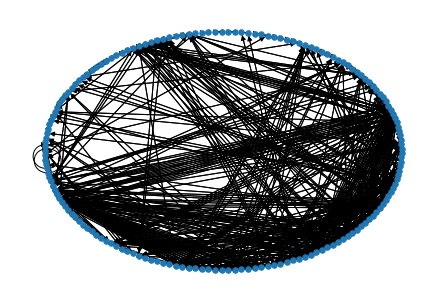

In [48]:
nx.draw_shell(G, with_labels = False, node_size = 30)

In [45]:
G.number_of_nodes()

169

In [46]:
G.number_of_edges()

1302